# Chapter 5: Evaluating Predictive Performance

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition)
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.


## Import required packages

In [1]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt


!pip install scikit-plot
import scikitplot as skplt
!pip install dmba
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 14.6 MB/s eta 0:00:00
Colab environment detected.


## Load file and generate training and validation sets.


* load the Toyota Corolla file
* remove variables Model, ID, Price, Fuel Type and COlor from the model
* create training and validation data sets
* fit a regression model predicting the price

In [2]:
car_df = pd.read_csv('ToyotaCorolla.csv')
car_df.shape

(1436, 39)

In [3]:
car_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [4]:
car_df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [5]:
#create an exclusion columns
excluded_columns = ('Price', 'Id', 'Fuel_Type', 'Color', 'Model')
outcome = 'Price'
predictors = [s for s in car_df.columns if s not in excluded_columns] #s  is loop columns dictionary
outcome

'Price'

In [6]:
excluded_columns = ('Price', 'Id', 'Fuel_Type', 'Color', 'Model')
outcome = 'Price'
predictors = [s for s in car_df.columns if s not in excluded_columns] #s  is loop columns dictionary
predictors

['Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'HP',
 'Met_Color',
 'Automatic',
 'CC',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Parking_Assistant',
 'Tow_Bar']

In [7]:
X = car_df[predictors] #independent variables
X.head()

,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,23,10,2002,46986,90,1,0,2000,3,4,...,1,1,0,0,0,1,0,0,0,0
1,23,10,2002,72937,90,1,0,2000,3,4,...,0,1,0,0,0,1,0,0,0,0
2,24,9,2002,41711,90,1,0,2000,3,4,...,0,1,0,0,0,1,0,0,0,0
3,26,7,2002,48000,90,0,0,2000,3,4,...,0,1,0,0,0,1,0,0,0,0
4,30,3,2002,38500,90,0,0,2000,3,4,...,1,1,0,1,0,1,0,0,0,0


In [8]:
y = car_df[outcome]  #or price
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [15]:
#train and validate split
X = car_df[predictors] #independent variables
X.head()
y = car_df[outcome]  #or price
y.head()
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.4, random_state=1)  #test is valid, random state to get the same value for all of us
#or valid_X, train_X, valid_y, train_y = train_test_split(X,y, test_size=0.6, random_state=1) we just interchanged


In [16]:
#just to show how the data was split; but this is not necessary, just to check
print(car_df.shape)
print(train_X.shape) #train
valid_X.shape #valid

(1436, 39)
(861, 34)


(575, 34)

In [11]:
car_lm = LinearRegression() #lm is own name
car_lm.fit(train_X, train_y)


LinearRegression()

In [12]:
car_lm.intercept_

-31011.101998925806

In [13]:
X.columns

Index(['Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color',
       'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax',
       'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [14]:
car_lm.coef_  #full regression   price = -31k + (-119)Age....

array([-1.19084824e+02, -1.00992973e+02,  1.83398164e+01, -1.75999730e-02,
        3.10151734e+01, -5.43485982e+01,  5.45277156e+02, -1.41227782e+00,
        1.21773418e+02, -2.27373675e-13,  1.09933328e+02,  1.22572185e+01,
        8.98386567e+00,  1.63419739e+02,  3.24432206e+02,  6.28647542e+01,
       -2.29828412e+02,  6.07222547e+02, -2.52431928e+01,  1.17393685e+02,
        2.45835648e+03, -3.17003428e+02,  2.33962982e+02,  1.82167764e+02,
        2.48287344e+02, -6.73320473e+02,  4.67694162e+02, -8.49953587e+01,
        4.12167347e+02, -6.60072676e+01,  3.29105905e+02, -4.26824379e+02,
       -3.13436787e+02, -1.81600322e+02])

In [17]:
train_y  #compare train with predict i.e. 7750 vs 7932 =
#first column is index and is in random order

1238     7750
1085     7950
680      7950
593     10950
647      6950
        ...  
715      8490
905      9950
1096     7900
235     11650
1061     5800
Name: Price, Length: 861, dtype: int64

In [18]:
car_lm.predict(train_X)[0:5] #to show just 5

array([ 7932.01337366,  7627.8052697 ,  9212.69440439, 11815.78849908,
        8538.36955939])

In [25]:
regressionSummary(train_y, car_lm.predict(train_X)) #order doesn't matter;
#model is wrong by USD 811 on average based on MAE (errors are based on the diff bet the actual train_y and predicted train_X )
#compare train y and predictions of the model
#mean error always 0 as it is optimizing the regression and fitting the line so that all positive negatives cancel themselves out
#MAPE model is wrong by 8%
#root squar root
#take the ave error or the root square error
#use MAE if:
#if im off by a lot (outlier), to RMSE captures that and penalizes it heavily
#if this is a fraud model, we are sensitive to the large errors, then we use RMSE to interpret;
#if not you can use MAE


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1121.0606
            Mean Absolute Error (MAE) : 811.6770
          Mean Percentage Error (MPE) : -0.8630
Mean Absolute Percentage Error (MAPE) : 8.0054


In [38]:
regressionSummary(valid_y, car_lm.predict(valid_X))
#to check how good the model is
#when using valid, our ME is no longer 0. when we use to build regressions, the trains we're forcing to be zero for the lines to fit
#it appears to be biased based on the ME 97, we may have an outlier
#is it over fit? yes, somehow. but we dont know
#overtfit:
#MAE is 880 vs 811, whic is OVERFIT; which means the fit stats for build/train are better than valid
#underfit means fit stats for valid are better (lower) than the build/train; it doesn't HAPPEN USUALLY


Regression statistics

                      Mean Error (ME) : 97.1891
       Root Mean Squared Error (RMSE) : 1382.0352
            Mean Absolute Error (MAE) : 880.1396
          Mean Percentage Error (MPE) : 0.0138
Mean Absolute Percentage Error (MAPE) : 8.8744


In [31]:
pred_y=car_lm.predict(train_X)
pred_y
#R squared = 1 - RSS/Tss  res idual sum of squares/total sum of squares total variance, residual (unexplained)
#R2 always goes up when you add a variable, but adjust R2 doesnt necessarily bec there is a penalty for adding a var
#adjusted R2 - it adds in the number of variables K; the more variables, the lower the variance,
#penalty for too many variables

array([ 7932.01337366,  7627.8052697 ,  9212.69440439, 11815.78849908,
        8538.36955939,  7435.58793892, 11390.38451357,  9284.25270195,
       11779.50598789,  6310.2512214 ,  8807.497698  ,  8667.69198036,
        6369.41915305, 17736.23283497, 21530.49521581,  8646.74445475,
        9417.36196237, 10509.95566729,  6649.23682753,  8147.05203007,
        7517.34851623, 13588.08123052,  8494.82129738, 10456.69051225,
        7778.67489647,  8666.69791413, 12053.64535134, 13472.039766  ,
       11497.57658857, 10997.22391221,  6725.03428465,  8820.28205254,
       18255.80042011, 11794.36553286,  9364.21559919, 15044.05907226,
        7308.93991908,  7840.02856454,  8389.04624527, 11992.11007131,
        7475.16036017, 10307.27885217, 11173.57480757,  9518.52281859,
        8763.04472751, 12558.9131652 , 18456.85313364, 10076.88141248,
       14958.54000857,  8296.02090136,  9000.53726423,  6089.20844434,
       10573.21856217,  8686.77542997, 11472.02979124, 19581.77799155,
      

In [34]:
from dmba import adjusted_r2_score
#for the adjusted R2

In [33]:
adjusted_r2_score(train_y, pred_y, car_lm)
#model explains the variance in the price 90%; the bigger the better

0.9047476101088163

In [39]:
#prediction dataframe for the validate
car_lm_predict = car_lm.predict(valid_X)
car_lm_predict[0:5]

array([11471.50091254, 10530.92884588, 13217.33334087,  6184.25203505,
       12938.87695302])

In [42]:
result = pd.DataFrame({'predicted': car_lm_predict,
                       'actual': valid_y,
                       'residual': valid_y - car_lm_predict})
result.head()
#

,predicted,actual,residual
509,11471.500913,10900,-571.500913
435,10530.928846,10895,364.071154
321,13217.333341,10750,-2467.333341
1055,6184.252035,6500,315.747965
288,12938.876953,11895,-1043.876953


from matplotlib import pyplot as plt
_df_0['predicted'].plot(kind='hist', bins=20, title='predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['actual'].plot(kind='hist', bins=20, title='actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['residual'].plot(kind='hist', bins=20, title='residual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='predicted', y='actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='actual', y='residual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['predicted'].plot(kind='line', figsize=(8, 4), title='predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['actual'].plot(kind='line', figsize=(8, 4), title='actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['residual'].plot(kind='line', figsize=(8, 4), title='residual')
plt.gca().spines[['top', 'right']].set_visible(False)

In [41]:
#NEW MODEL
car_df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [43]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


## Using selected variables for regression

In [44]:
predictors_2 = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'CC', 'Doors', 'Weight']

In [45]:
X2 = car_df[predictors_2]
X2

,Age_08_04,KM,Fuel_Type,HP,Automatic,CC,Doors,Weight
0,23,46986,Diesel,90,0,2000,3,1165
1,23,72937,Diesel,90,0,2000,3,1165
2,24,41711,Diesel,90,0,2000,3,1165
3,26,48000,Diesel,90,0,2000,3,1165
4,30,38500,Diesel,90,0,2000,3,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,0,1300,3,1025
1432,72,19000,Petrol,86,0,1300,3,1015
1433,71,17016,Petrol,86,0,1300,3,1015
1434,70,16916,Petrol,86,0,1300,3,1015


In [46]:
X2 = pd.get_dummies(car_df[predictors_2], drop_first=True)
X2
#we are dropping the first dummy var for fuel type; fuel is a categorical variable

,Age_08_04,KM,HP,Automatic,CC,Doors,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,1165,1,0
1,23,72937,90,0,2000,3,1165,1,0
2,24,41711,90,0,2000,3,1165,1,0
3,26,48000,90,0,2000,3,1165,1,0
4,30,38500,90,0,2000,3,1170,1,0
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,1025,0,1
1432,72,19000,86,0,1300,3,1015,0,1
1433,71,17016,86,0,1300,3,1015,0,1
1434,70,16916,86,0,1300,3,1015,0,1


In [47]:
y2 = car_df[outcome]  #or 'Price'
y2

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [49]:
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X2, y2, test_size=0.3, random_state=123) #30% test, 70% build just to be diff.
#random state is always 1 but 123 in this example

In [50]:
car_lm2 = LinearRegression()
car_lm2.fit(train_X2, train_y2)

LinearRegression()

In [52]:
regressionSummary(valid_y2, car_lm2.predict(valid_X2))
#MAPE is 10% vs 8% in previous; worse model


Regression statistics

                      Mean Error (ME) : -154.7867
       Root Mean Squared Error (RMSE) : 1745.5589
            Mean Absolute Error (MAE) : 1019.6440
          Mean Percentage Error (MPE) : -2.4793
Mean Absolute Percentage Error (MAPE) : 10.0470


In [54]:
#NEW MODEL
adjusted_r2_score(valid_y2, car_lm2.predict(valid_X2), car_lm2)  #previous model is better than this

0.7751582453677454

In [55]:
#old MODEL FROM ABOVE
adjusted_r2_score(valid_y, car_lm.predict(valid_X), car_lm)

0.8343017012539553

## Create a distribution of the residuals

* calculate the residual values for the training set
* calculate the residual values for the validation set
* create a historgram of the residual values for normality check
* create a boxplot of the residuals for possible outlier check

In [56]:
#WE CAN tolerate skewed as long our errors are normally distributed (residuals)
#using the first model since it was better
pred_error_train = pd.DataFrame({'residual': train_y - car_lm.predict(train_X),
                                 'data_set': 'train'})


In [57]:
pred_error_valid = pd.DataFrame({'residual': valid_y - car_lm.predict(valid_X),
                                 'data_set': 'valid'})


In [58]:
box_df = pred_error_train.append(pred_error_valid, ignore_index=True)
box_df

<ipython-input-58-9192b9b20047>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  box_df = pred_error_train.append(pred_error_valid, ignore_index=True)


,residual,data_set
0,-182.013374,train
1,322.194730,train
2,-1262.694404,train
3,-865.788499,train
4,-1588.369559,train
...,...,...
1431,1789.218032,valid
1432,-551.272524,valid
1433,1050.051714,valid
1434,53.907218,valid


array([<Axes: title={'center': 'residual'}>], dtype=object)

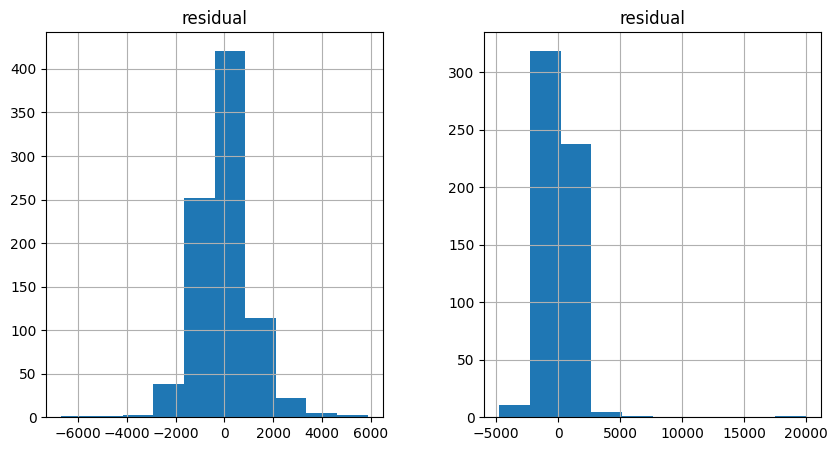

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2) #1 row charts, 2 columns of charts
fig.set_size_inches(10,5)
pred_error_train.hist(ax=ax[0]) #0 is the first box
pred_error_valid.hist(ax=ax[1])
#result is biased bec graph is skewed

<Axes: title={'center': 'residual'}, xlabel='[data_set]'>

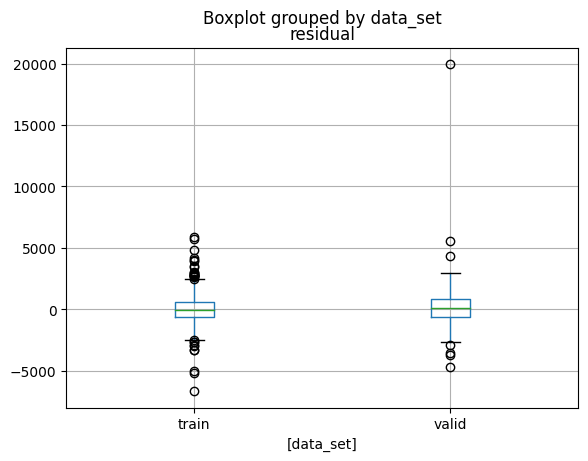

In [60]:
box_df.boxplot(by='data_set') #distribution of residuals; outliers only